In [119]:
import numpy as np
from typing import Tuple
import sys
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

sys.path.append("../")
from training.util_prediction import get_coordinate_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## import and display data 

In [85]:
dataset = "../data/spots_synt4_af4f7386.npz"
with np.load(dataset, allow_pickle=True) as data:
        train_x = data["x_train"]
        valid_x = data["x_valid"]
        test_x = data["x_test"]
        train_y = data["y_train"]
        valid_y = data["y_valid"]
        test_y = data["y_test"]

In [86]:
idx = 0
image = train_x[idx]
mask = train_y[idx]

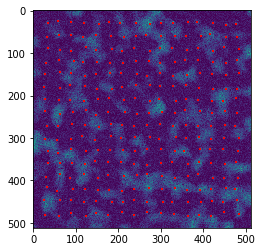

In [137]:
plt.imshow(image)
coordList = get_coordinate_list(mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=5)

## Flip

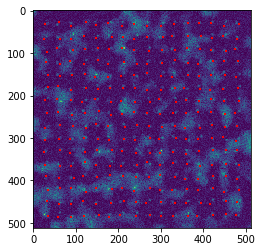

In [139]:
from spot_detection.models.util_augment import flip
new_img, new_mask = flip(image,mask)
plt.imshow(new_img)
coordList = get_coordinate_list(new_mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=5)

In [135]:
np.sum(mask[...,1:]!=0)

512